<a href="https://colab.research.google.com/github/jagadish9084/learnbay-ds-ml-course/blob/main/classification/l_eligibility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import liberaries and load data

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import ConfusionMatrixDisplay, classification_report, accuracy_score, fbeta_score
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Load data
data = pd.read_csv('/content/sample_data/l_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
# check the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data cleaning and feature selection

In [122]:
# Standardise column names

data.columns = data.columns.str.strip().str.lower()

In [123]:
# Check Missing values
missing_values_col = data.isna().sum()*100/len(data)
missing_values_col = missing_values_col[missing_values_col > 0]
missing_values_col

,0
gender,2.117264
married,0.488599
dependents,2.442997
self_employed,5.211726
loanamount,3.583062
loan_amount_term,2.280130
credit_history,8.143322


In [124]:
# Impute missing values
columns = missing_values_col.index
print(columns)
# Handle missing values for categorycal columns
for col in columns:
  df_col = data[col]
  if data[col].dtype =='O':
    data[col].fillna(data[col].mode()[0], inplace=True)
  else:
    data[col].fillna(data[col].mean(), inplace=True)

Index(['gender', 'married', 'dependents', 'self_employed', 'loanamount',
       'loan_amount_term', 'credit_history'],
      dtype='object')


In [125]:
# Check Missing values after imputation
missing_values_col = data.isna().sum()*100/len(data)
missing_values_col = missing_values_col[missing_values_col > 0]
missing_values_col

,0


In [126]:
# Remove un important columns
data.drop(['loan_id'], axis=1, inplace=True)

In [127]:
# Encode dependents to numeric
data['dependents'] = data['dependents'].map({'0':0, '1': 1, '2': 2, '3+': 3})
data['gender'] = data['gender'].map({'Male':1, 'Female': 0})
data['married'] = data['married'].map({'No':0, 'Yes': 1})

In [128]:
data = pd.get_dummies(data, dtype=int, drop_first=True)

In [129]:
# Rename columns
data.columns = data.columns.str.replace('education_Not Graduate', 'graduate')
data.columns = data.columns.str.replace('self_employed_Yes', 'self_employed')
data.columns = data.columns.str.replace('property_area_Semiurban', 'semiurban')
data.columns = data.columns.str.replace('property_area_Urban', 'urban')
data.columns = data.columns.str.replace('loan_status_Y', 'loan_status')

In [130]:
# Split data into dependent and target
X = data.drop(['loan_status'], axis=1)
y = data[['loan_status']]
print(f'Dimention of X: {X.shape}')
print(f'Dimention of y: {y.shape}')

Dimention of X: (614, 12)
Dimention of y: (614, 1)


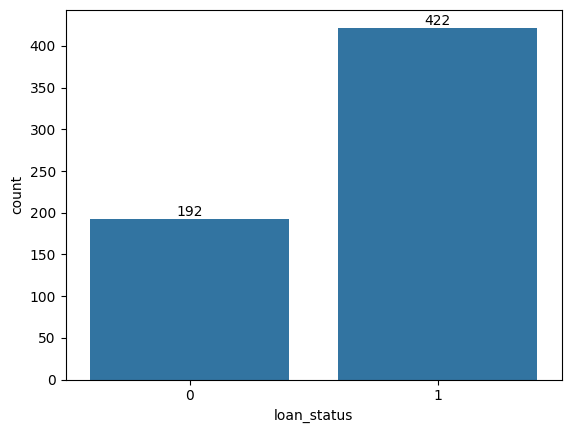

In [131]:
# Label distribution plot
ax = sns.countplot(data=data, x='loan_status', )
plt.bar_label(ax.containers[0])
plt.show()

In [132]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'Dimention of X_train: {X_train.shape}')
print(f'Dimention of X_test: {X_test.shape}')
print(f'Dimention of y_train: {y_train.shape}')
print(f'Dimention of y_test: {y_test.shape}')

Dimention of X_train: (460, 12)
Dimention of X_test: (154, 12)
Dimention of y_train: (460, 1)
Dimention of y_test: (154, 1)


# Logistic Regression

In [133]:
# Logistic regression model
log_reg_pipeline = Pipeline([('scalar', StandardScaler()),('lr', LogisticRegression())])
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('lr', LogisticRegression())])

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.44      0.60       138
           1       0.80      0.98      0.88       322

    accuracy                           0.82       460
   macro avg       0.86      0.71      0.74       460
weighted avg       0.84      0.82      0.80       460

Accuracy: 81.96
f2_score: 93.99


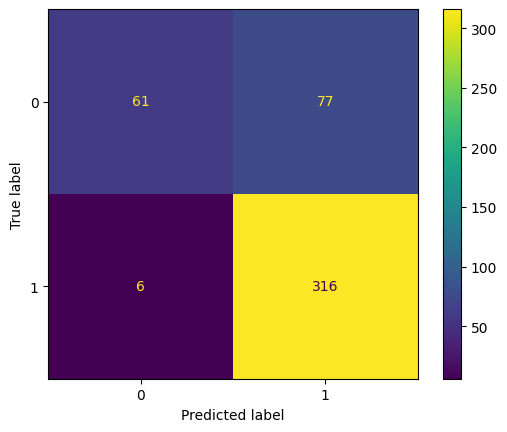

In [134]:
# Evaluation on training data
y_train_pred = log_reg_pipeline.predict(X_train)
cm = ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=y_train_pred)
print(f"Classification Report:\n{classification_report(y_true=y_train, y_pred=y_train_pred)}")
print(f"Accuracy: {round(accuracy_score(y_true=y_train, y_pred=y_train_pred)*100 , 2)}")
print(f"f2_score: {round(fbeta_score(y_true=y_train, y_pred=y_train_pred, beta=2)*100 , 2)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.41      0.56        54
           1       0.75      0.98      0.85       100

    accuracy                           0.78       154
   macro avg       0.84      0.69      0.71       154
weighted avg       0.81      0.78      0.75       154

Accuracy: 77.92
f2_score: 92.45


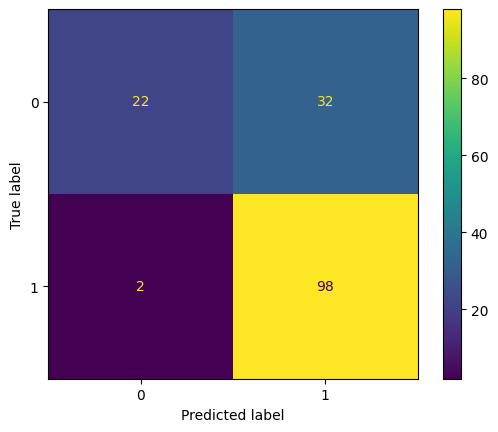

In [135]:
# Evaluation on test data
y_test_pred = log_reg_pipeline.predict(X_test)
cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred)
print(f"Classification Report:\n{classification_report(y_true=y_test, y_pred=y_test_pred)}")
print(f"Accuracy: {round(accuracy_score(y_true=y_test, y_pred=y_test_pred)*100 , 2)}")
print(f"f2_score: {round(fbeta_score(y_true=y_test, y_pred=y_test_pred, beta=2)*100 , 2)}")


Training and Testing Performance Summary:

1. Accuracy: 81.96(Training) and 77.92(Testing)
2. Precision: 0.80(Training) and 0.75(Testing)
3. Recall: 0.98 for both training and testing
4. F2-Scor2: 93.99(Training) and 92.45(Testing)

Analysis:

1. Accuracy: The model accuracy is droped from 81.96% in gtraining to 77.92% in testing, indicating that slight decrease in generalization performance. It suggest that the model mighr slightly be overfitting to the the training data.
2. Precision: There is a reduction precision from 0.80(Training) to 0.75(Testing). This means that the model is making more false positive predication on the testing set than the training set.
3. Recall: The recall remains consistantly high at 98.0 for both training and testing set. This indicate that the model is effective at capturing nearly all elligible loan approvals in both data set, which aligh with maximising goal of recall.
4. F2-Score: F2-score shows a slight decrease from 93.99(Training) to 92.45(Testing). The F2-score weights recalls more heavely, so the drops is maily due to precision rather than recall.

Conclusion and recomendations:

1. The model maintains a high recals(0.98) across both datasets, which is enssential for loan approval model since it ensuresmost elligible applicants are identified.
2. The drop in accuracy and precision from training to testing indicate that some level of overfitting the training data, which can be addressed using regularization or reducing model complexity or by using cross validation.
3. Improving precision: While recall is prioritized in loan approval model, reducing precision will ensure that false postive which means we can reduce the falsely approving the loan when applicant is not elligible. this reduce the risk associated with approving un qaulified applicant.

Overall, the model is quite strong for racall focused tasks, but there is a room for improving generalization to boost precision and accuracy on testing data.